### Flight and Ticket Data Anaysis
#### Saeed Shahmiri

In [68]:
#Importing required packages
import pandas as pd 
import numpy as np 
from scipy import stats
import plotly.express as px
import seaborn as sns
from scipy.stats.stats import pearsonr
from scipy.stats import chi2
from scipy.stats import *
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# %matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 5]
import warnings
warnings.filterwarnings('ignore')
# pd.options.display.float_format = '{:.2f}'.format

# A 
## A-1 Importing data files and looking at their information

In [69]:
flights = pd.read_csv('C:/Users/jshahms/Downloads/data/Flights.csv')
airport_codes = pd.read_csv('C:/Users/jshahms/Downloads/data/Airport_Codes.csv')
tickets = pd.read_csv('C:/Users/jshahms/Downloads/data/Tickets.csv')
print(tickets.info())
print(airport_codes.info())
print(flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Colum

In [70]:
airport_codes.describe

<bound method NDFrame.describe of                  TYPE                                NAME  ELEVATION_FT  \
0            heliport                   Total Rf Heliport          11.0   
1       small_airport                Aero B Ranch Airport        3435.0   
2       small_airport                        Lowell Field         450.0   
3       small_airport                        Epps Airpark         820.0   
4              closed  Newport Hospital & Clinic Heliport         237.0   
...               ...                                 ...           ...   
55364  medium_airport               Yingkou Lanqi Airport           0.0   
55365  medium_airport             Shenyang Dongta Airport           NaN   
55366        heliport                     Sealand Helipad          40.0   
55367   small_airport           Glorioso Islands Airstrip          11.0   
55368   small_airport             Satsuma IÅjima Airport         338.0   

      CONTINENT ISO_COUNTRY      MUNICIPALITY IATA_CODE  \
0     

In [71]:
airport_codes.head(5)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"


In [72]:
airport_codes.tail(5)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
55364,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,Yingkou,YKH,"122.3586, 40.542524"
55365,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,Shenyang,NaN,"123.49600219726562, 41.784400939941406"
55366,heliport,Sealand Helipad,40.0,EU,GB,Sealand,NaN,"1.4825, 51.894444"
55367,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,Grande Glorieuse,NaN,"47.296388888900005, -11.584277777799999"
55368,small_airport,Satsuma IÅjima Airport,338.0,AS,JP,Mishima-Mura,NaN,"130.270556, 30.784722"


In [73]:
flights.describe

<bound method NDFrame.describe of             FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0        2019-03-02         WN   N955WN              4591              14635   
1        2019-03-02         WN   N8686A              3231              14635   
2        2019-03-02         WN   N201LV              3383              14635   
3        2019-03-02         WN   N413WN              5498              14635   
4        2019-03-02         WN   N7832A              6933              14635   
...             ...        ...      ...               ...                ...   
1915881     3/23/19         AA   N903NN              1433              15370   
1915882     3/24/19         AA   N965AN              1433              15370   
1915883     3/25/19         AA   N979NN              1433              15370   
1915884     3/26/19         AA   N872NN              1433              15370   
1915885     3/27/19         AA   N945AN              1433              15370   

     

In [74]:
flights.head(5)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [75]:
tickets.describe

<bound method NDFrame.describe of               ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0        201912723049  2019        1    ABI             US               TX   
1        201912723085  2019        1    ABI             US               TX   
2        201912723491  2019        1    ABI             US               TX   
3        201912723428  2019        1    ABI             US               TX   
4        201912723509  2019        1    ABI             US               TX   
...               ...   ...      ...    ...            ...              ...   
1167280  201911284909  2019        1    YAK             US               AK   
1167281  201911284959  2019        1    YAK             US               AK   
1167282  201911284940  2019        1    YAK             US               AK   
1167283  201911284914  2019        1    YAK             US               AK   
1167284  201911284952  2019        1    YAK             US               AK   

        ORIGIN_ST

In [76]:
tickets.tail()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
1167280,201911284909,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,244.0,ANC
1167281,201911284959,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,371.0,JNU
1167282,201911284940,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,271.0,JNU
1167283,201911284914,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,603.0,ANC
1167284,201911284952,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,299.0,JNU


In [77]:
#filtering data based on requuired fields
#filtering on medium and large airports in the U.S
airport_codes=airport_codes[((airport_codes['TYPE']=='medium_airport') | (airport_codes['TYPE']=='large_airport')) & (airport_codes['ISO_COUNTRY']=='US') ]
#filtering on round trip tickets
tickets=tickets[tickets['ROUNDTRIP']==1]
#3filtering on flights that were not canceled
flights=flights[flights['CANCELLED']==0]

In [78]:
# tickets['ITIN_FARE'][55:59]

# B
## B-1 Data cleaning: duplicates removing
checking for duplicates and removing them

In [79]:
print (len(airport_codes))
print (len(airport_codes.drop_duplicates()))
print (len(flights))
print (len(flights.drop_duplicates()))
print (len(tickets))
print (len(tickets.drop_duplicates()))
airport_codes=airport_codes.drop_duplicates()
flights=flights.drop_duplicates()
tickets=tickets.drop_duplicates()

858
858
1864272
1859862
708600
661036


In [80]:
number_duplicates_airport= 858-858
number_duplicates_flight=1864272-1859862
number_duplicates_tickets=708600-661036
print(number_duplicates_airport)
print(number_duplicates_flight)
print(number_duplicates_tickets)

0
4410
47564


## B-2 Removing unnecessary columns from data files

In [81]:
## Removing Unneccesary columns from each table to clean the data
airport_codes=airport_codes.drop(['NAME','CONTINENT','ISO_COUNTRY','MUNICIPALITY','COORDINATES','ELEVATION_FT'],axis=1)
tickets=tickets.drop(['ITIN_ID','YEAR','QUARTER','ORIGIN_COUNTRY','ORIGIN_STATE_ABR','ROUNDTRIP'],axis=1)
flights=flights.drop(['FL_DATE','OP_CARRIER_FL_NUM','TAIL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'],axis=1)

## B-3 Type casting some variables with object values to integer or float
### Discrepencies in data found 
1) Numbers have sometimes dollar symbol attached to it. Removing the dollar sign
2) DISTANCE AND AIR_TIME have sometime alphabatical values. So removing them and putting those values to null

In [82]:
tickets = tickets.assign(ITIN_FARE = lambda x: x['ITIN_FARE'].str.extract('(\d+)'))
flights = flights.assign(AIR_TIME = lambda x: x['AIR_TIME'].str.extract('(\d+)'))
flights = flights.assign(DISTANCE = lambda x: x['DISTANCE'].str.extract('(\d+)'))

For flights distance, it irrelavant that they have hundred miles or twenty miles values so putting these values to null. Later on we would impute these null values

In [83]:
## Finally typecasting some object columns to float. 
flights['AIR_TIME']=flights['AIR_TIME'].astype(float)
flights['DISTANCE']=flights['DISTANCE'].astype(float)
tickets['ITIN_FARE']=tickets['ITIN_FARE'].astype(float)

## Remove negative values from DEP_DELAY and ARR_DELAY as they are later used in calculation
"""Negating 15 minutes from Dep_Delay and Arr_delay. In case substraction is negative replacing it with 0.This would be used in later 
 on calculations"""

flights['DEP_DELAY'].loc[flights['DEP_DELAY']<0]=0
flights['ARR_DELAY'].loc[flights['ARR_DELAY']<0]=0
flights['DEP_DELAY']=np.where((flights['DEP_DELAY']-15<0),0 , flights['DEP_DELAY']-15)
flights['ARR_DELAY']=np.where((flights['ARR_DELAY']-15<0),0 , flights['ARR_DELAY']-15)


"""Similarly multiplying occupancy_rate by 200 as all the flights are of 200 capicity. This would also be used in later on calculations"""
flights['OCCUPANCY_RATE']=flights["OCCUPANCY_RATE"]*200

## B-4 Checking for outliers and handling them
### FLIGHTS and TICKETS DATA

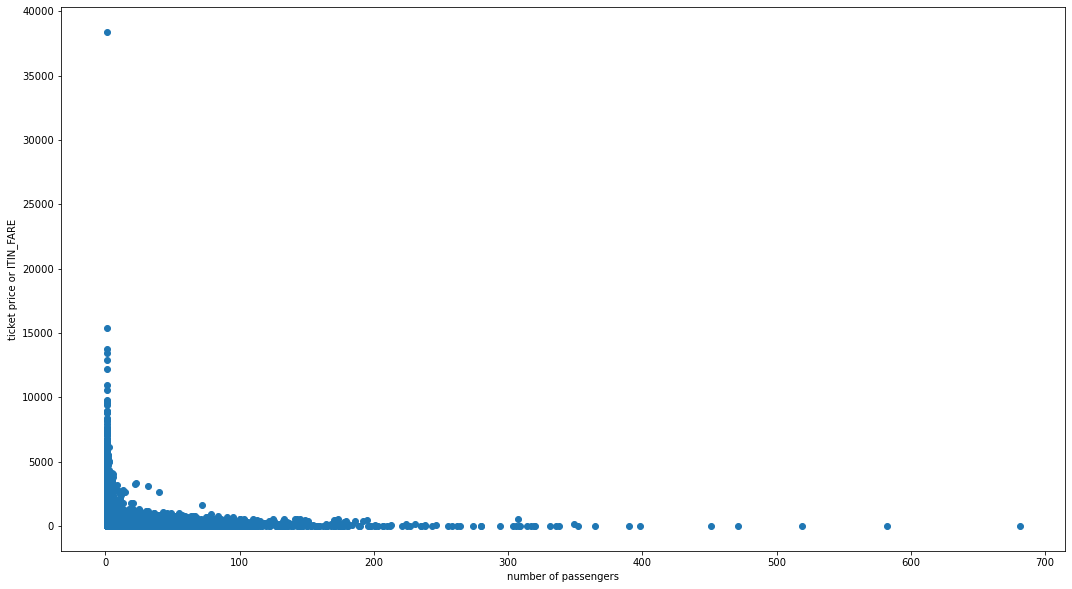

In [84]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(tickets['PASSENGERS'], tickets['ITIN_FARE'])
 
# x-axis label
ax.set_xlabel('number of passengers')
 
# y-axis label
ax.set_ylabel('ticket price or ITIN_FARE')
plt.show()

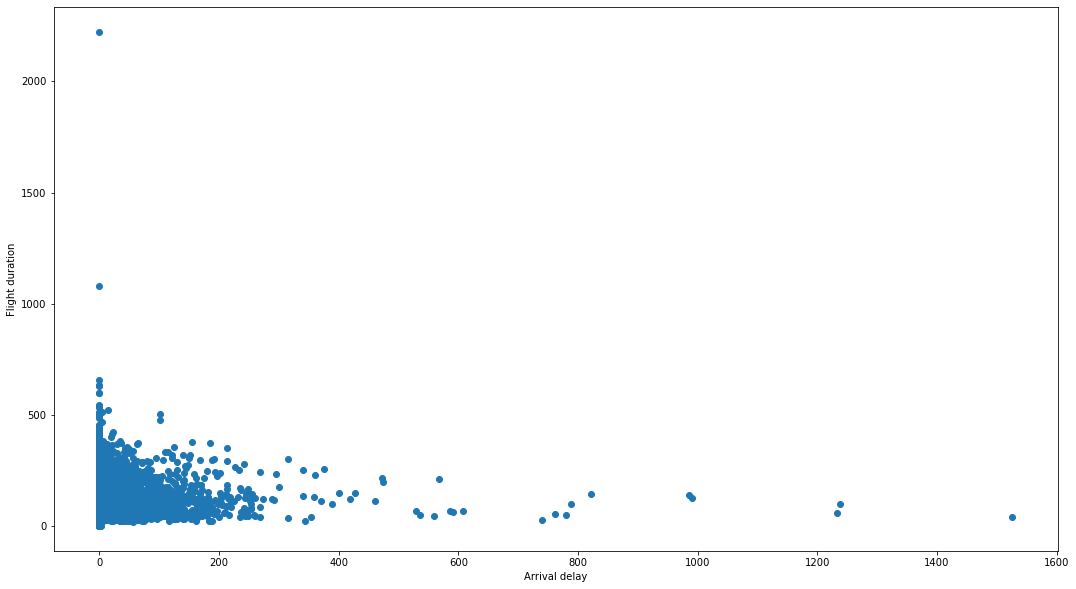

In [85]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(flights['ARR_DELAY'], flights['AIR_TIME'])
 
# x-axis label
ax.set_xlabel('Arrival delay')
 
# y-axis label
ax.set_ylabel('Flight duration')
plt.show()

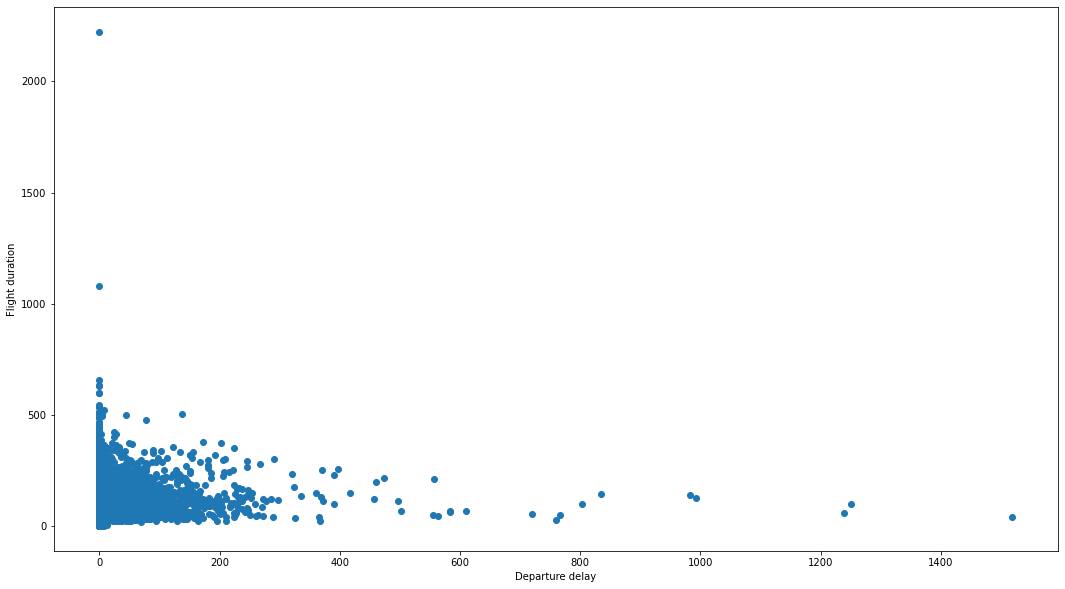

In [86]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(flights['DEP_DELAY'], flights['AIR_TIME'])
 
# x-axis label
ax.set_xlabel('Departure delay')
 
# y-axis label
ax.set_ylabel('Flight duration')
plt.show()

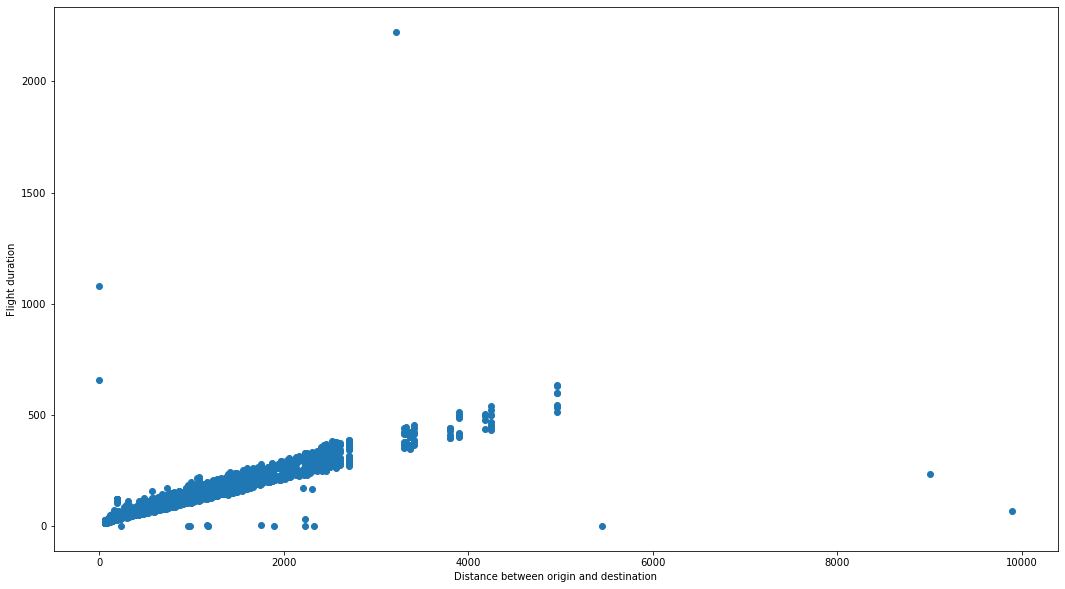

In [87]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(flights['DISTANCE'], flights['AIR_TIME'])
 
# x-axis label
ax.set_xlabel('Distance between origin and destination')
 
# y-axis label
ax.set_ylabel('Flight duration')
plt.show()

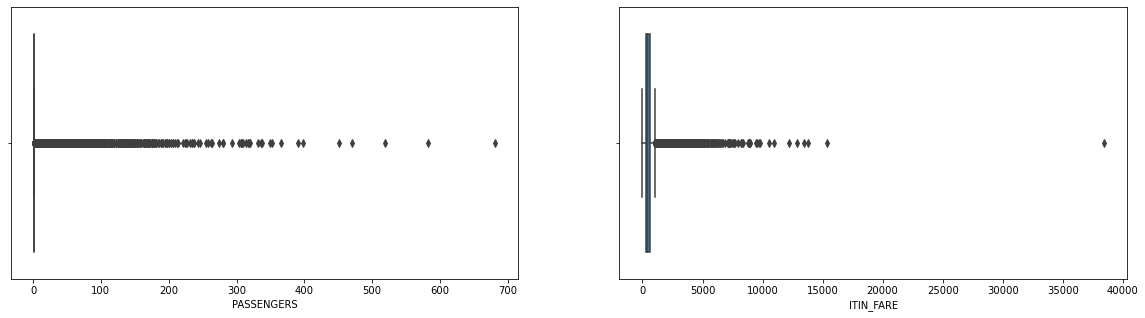

In [88]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x='PASSENGERS',data=tickets,ax=ax[0])
sns.boxplot(x='ITIN_FARE',data=tickets,ax=ax[1])
fig.show()

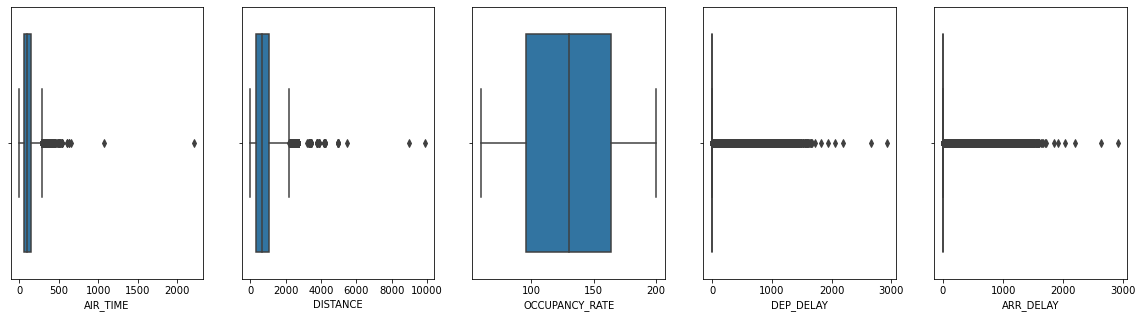

In [89]:
fig, ax =plt.subplots(1,5)
sns.boxplot(x='AIR_TIME',data=flights,ax=ax[0])
sns.boxplot(x='DISTANCE',data=flights,ax=ax[1])
sns.boxplot(x='OCCUPANCY_RATE',data=flights,ax=ax[2])
sns.boxplot(x='DEP_DELAY',data=flights,ax=ax[3])
sns.boxplot(x='ARR_DELAY',data=flights,ax=ax[4])


fig.show()

How it could be that the fare is so low.

In [90]:
tickets[tickets['ITIN_FARE']>10000]

,ORIGIN,ORIGIN_STATE_NM,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
36135,PIH,Idaho,OO,1.0,13790.0,SLC
110692,BDL,Connecticut,YV,1.0,12225.0,IAH
355172,EWR,New Jersey,UA,1.0,12882.0,ORD
527911,LAX,California,UA,1.0,10944.0,ORD
586574,MCI,Missouri,UA,1.0,10564.0,PHX
927914,SFO,California,UA,1.0,13474.0,LAS
929787,SFO,California,UA,1.0,15365.0,EWR
968736,SLC,Utah,OO,1.0,38400.0,TWF


Some ticket fares are too high. The last one which is 38400 seems unreasonable

## B-5 Dealing with outliers
Here are three techniques we can use to handle outliers:

1. Drop the outliers
2. Cap the outliers
3. Replace outliers using imputation as if they were missing values

By seeing various plots we could determine what values we want to consider as outliers and how do we want to replace them 


In [91]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [92]:
#let's check and see if values for outliers have changed
outliers = find_outliers_IQR(flights['DEP_DELAY'])

print('number of outliers:'+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value:'+ str(outliers.min()))

number of outliers:336022
max outlier value: 2926.0
min outlier value:1.0


In [93]:
#defining  afunction 
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper, df.mean(), np.where(df < lower,df.mean(),df))
    return df

In [137]:
flights['AIR_TIME']=impute_outliers_IQR(flights['AIR_TIME'])
flights['DISTANCE']=impute_outliers_IQR(flights['DISTANCE'])
flights['DEP_DELAY']=impute_outliers_IQR(flights['DEP_DELAY'])
flights['ARR_DELAY']=impute_outliers_IQR(flights['ARR_DELAY'])


In [95]:
tickets['PASSENGERS']=impute_outliers_IQR(tickets['PASSENGERS'])
tickets['ITIN_FARE']=impute_outliers_IQR(tickets['ITIN_FARE'])

## B-6  Dealing with null values

The missing data for each dataframe is less than 1%. So will be filling the values with median as it is robust to outliers. It is seen that there are many outliers in our data and we could not confirm that if they are actual outliers. 

In [96]:
print (airport_codes.isnull().sum()* 100 / len(airport_codes))
## IATA_CODE missing we could remove those rows. As it is the basic necessity and nothing could be done for it. 

print (tickets.isnull().sum()* 100 / len(tickets))
## PASSENGERS and ITIN_FARE is missing. We will try to replace nulls with median as it is robust to outliers.

print (flights.isnull().sum()* 100 / len(flights))
##  ARR_DELAY , AIR_TIME,DISTANCE,OCCUPANCY_RATE. Replace with median

TYPE         0.000000
IATA_CODE    4.312354
dtype: float64
ORIGIN               0.000000
ORIGIN_STATE_NM      0.000000
REPORTING_CARRIER    0.000000
PASSENGERS           0.145227
ITIN_FARE            0.068226
DESTINATION          0.000000
dtype: float64
OP_CARRIER           0.000000
ORIGIN               0.000000
ORIGIN_CITY_NAME     0.000000
DESTINATION          0.000000
DEST_CITY_NAME       0.000000
DEP_DELAY            0.000000
ARR_DELAY            0.234856
CANCELLED            0.000000
AIR_TIME            99.447163
DISTANCE            99.446518
OCCUPANCY_RATE       0.001667
dtype: float64


In [97]:
airport_codes.isnull().sum()/len(airport_codes)

TYPE         0.000000
IATA_CODE    0.043124
dtype: float64

In [98]:
print(tickets.shape)

(661036, 6)


In [99]:
airport_codes=airport_codes.fillna(airport_codes.median())
tickets=tickets.fillna(tickets.median())
flights=flights.fillna(flights.median())

In [100]:
print (airport_codes.isnull().sum())
## IATA_CODE missing we could remove those rows. As it is the basic necessity and nothing could be done for it. 

print (tickets.isnull().sum())
## PASSENGERS and ITIN_FARE is missing. We will try to replace nulls with median as it is robust to outliers.

print (flights.isnull().sum())
##  ARR_DELAY , AIR_TIME,DISTANCE,OCCUPANCY_RATE. Replace with median

TYPE          0
IATA_CODE    37
dtype: int64
ORIGIN               0
ORIGIN_STATE_NM      0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
dtype: int64
OP_CARRIER          0
ORIGIN              0
ORIGIN_CITY_NAME    0
DESTINATION         0
DEST_CITY_NAME      0
DEP_DELAY           0
ARR_DELAY           0
CANCELLED           0
AIR_TIME            0
DISTANCE            0
OCCUPANCY_RATE      0
dtype: int64


## B-7 Aggregating tickets and flights datasets 

In [101]:
tickets=tickets.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_STATE_NM':'first',
                                                   'PASSENGERS': np.sum,
                                                   'ITIN_FARE': np.sum}).reset_index()

## cancelled is not needed as we have filtered already for non-cancelled flights but still taking count as it could be used to find total number of fligts in the route
flights=flights.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_CITY_NAME':'first',
                                                                        'DEST_CITY_NAME': 'first',
                                                                        'DEP_DELAY': np.sum,
                                                                        'ARR_DELAY': np.sum,
                                                                        'AIR_TIME': np.sum,
                                                                        'DISTANCE': np.sum,
                                                                        'OCCUPANCY_RATE':np.sum,
                                                                        'CANCELLED':'count'}).reset_index()
print(tickets.shape)
print(flights.shape)
print(airport_codes.shape)

(40290, 5)
(5917, 10)
(858, 2)


## B-8 Building a final dataset by joining tickets, flights and airport datasets by primary keys

In [143]:
## merging all datasets 
final=tickets.merge(flights,on=['ORIGIN','DESTINATION'])
print(final)
final=final.merge(airport_codes,left_on='ORIGIN',right_on='IATA_CODE',suffixes=('_left', '_right'))
print(final)
final=final.merge(airport_codes,left_on='DESTINATION',right_on='IATA_CODE',suffixes=('_left', '_right'))
final.drop(columns={'IATA_CODE_left','IATA_CODE_right'},inplace=True)
final.rename(columns={'CANCELLED':'total_count'},inplace=True)
final['route']=final['ORIGIN_CITY_NAME']+' TO '+final['DEST_CITY_NAME']
data=final.copy()
data.shape

     ORIGIN DESTINATION ORIGIN_STATE_NM  PASSENGERS  ITIN_FARE  \
0       ABE         ATL    Pennsylvania   54.844939    25820.0   
1       ABE         CLT    Pennsylvania   28.883704    13369.0   
2       ABE         DTW    Pennsylvania   12.844939     3279.0   
3       ABE         FLL    Pennsylvania   66.379756    13569.0   
4       ABE         ORD    Pennsylvania   19.883704     9887.0   
...     ...         ...             ...         ...        ...   
5793    YAK         CDV          Alaska    1.000000       11.0   
5794    YAK         JNU          Alaska   13.922470     3698.0   
5795    YKM         SEA      Washington   25.728643     5097.0   
5796    YUM         DFW         Arizona    4.000000     1837.0   
5797    YUM         PHX         Arizona    2.000000      671.0   

                    ORIGIN_CITY_NAME         DEST_CITY_NAME   DEP_DELAY  \
0     Allentown/Bethlehem/Easton, PA            Atlanta, GA  218.259122   
1     Allentown/Bethlehem/Easton, PA          Charlotte, 

(5525, 16)

In [103]:
data.head(10)

,ORIGIN,DESTINATION,ORIGIN_STATE_NM,PASSENGERS,ITIN_FARE,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,total_count,TYPE_left,TYPE_right,route
0,ABE,ATL,Pennsylvania,54.844939,25820.000000,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",218.259122,441.825018,21049.0,139314.0,27844.0,217,medium_airport,large_airport,"Allentown/Bethlehem/Easton, PA TO Atlanta, GA"
1,ABQ,ATL,New Mexico,61.767409,24876.945610,"Albuquerque, NM","Atlanta, GA",103.932915,115.716076,16005.0,105930.0,21348.0,165,large_airport,large_airport,"Albuquerque, NM TO Atlanta, GA"
2,ABY,ATL,Georgia,5.000000,1729.000000,"Albany, GA","Atlanta, GA",374.158496,305.069655,24153.0,159858.0,32362.0,249,medium_airport,large_airport,"Albany, GA TO Atlanta, GA"
3,AEX,ATL,Louisiana,13.961235,5623.000000,"Alexandria, LA","Atlanta, GA",384.551787,357.667872,31040.0,205440.0,41078.0,320,medium_airport,large_airport,"Alexandria, LA TO Atlanta, GA"
4,AGS,ATL,Georgia,3.000000,723.000000,"Augusta, GA","Atlanta, GA",935.396239,904.689323,66251.0,438486.0,89280.0,683,large_airport,large_airport,"Augusta, GA TO Atlanta, GA"
5,ALB,ATL,New York,79.573582,33832.891221,"Albany, NY","Atlanta, GA",197.472539,252.471439,24250.0,160500.0,31998.0,250,medium_airport,large_airport,"Albany, NY TO Atlanta, GA"
6,ASE,ATL,Colorado,7.000000,2670.836831,"Aspen, CO","Atlanta, GA",218.259122,231.432152,8148.0,53928.0,10504.0,84,medium_airport,large_airport,"Aspen, CO TO Atlanta, GA"
7,AUS,ATL,Texas,200.945443,67383.836831,"Austin, TX","Atlanta, GA",800.283449,788.973246,81092.0,536712.0,108974.0,836,large_airport,large_airport,"Austin, TX TO Atlanta, GA"
8,AVL,ATL,North Carolina,12.961235,4391.000000,"Asheville, NC","Atlanta, GA",1112.082195,1293.916124,55581.0,367866.0,74596.0,573,large_airport,large_airport,"Asheville, NC TO Atlanta, GA"
9,AVP,ATL,Pennsylvania,21.961235,10407.000000,"Scranton/Wilkes-Barre, PA","Atlanta, GA",10.393292,73.637503,7954.0,52644.0,10982.0,82,medium_airport,large_airport,"Scranton/Wilkes-Barre, PA TO Atlanta, GA"


## Question 1
The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
Exclude canceled flights when performing the calculation.

In [104]:
top_ten_busy_rounds=data.sort_values(by='OCCUPANCY_RATE',ascending=False)[:10]
top_ten_busy_rounds

,ORIGIN,DESTINATION,ORIGIN_STATE_NM,PASSENGERS,ITIN_FARE,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,total_count,TYPE_left,TYPE_right,route
1624,SFO,LAX,California,838.424987,178725.782441,"San Francisco, CA","Los Angeles, CA",10518.011044,12665.650517,403518.0,2669707.0,545374.0,4176,large_airport,large_airport,"San Francisco, CA TO Los Angeles, CA"
2324,LAX,SFO,California,781.308692,145803.619272,"Los Angeles, CA","San Francisco, CA",12284.870607,13580.859483,402421.0,2662308.0,537180.0,4164,large_airport,large_airport,"Los Angeles, CA TO San Francisco, CA"
4038,ORD,LGA,Illinois,980.765978,254128.184155,"Chicago, IL","New York, NY",11359.867659,12392.139791,347431.0,2301818.0,465064.0,3580,large_airport,large_airport,"Chicago, IL TO New York, NY"
540,LGA,ORD,New York,941.021543,218687.564883,"New York, NY","Chicago, IL",9572.221513,12129.148709,347975.0,2299705.0,463962.0,3576,large_airport,large_airport,"New York, NY TO Chicago, IL"
1486,LAX,LAS,California,794.424987,142535.836831,"Los Angeles, CA","Las Vegas, NV",6849.179128,6942.964569,315143.0,2084904.0,424822.0,3257,large_airport,large_airport,"Los Angeles, CA TO Las Vegas, NV"
1587,LAS,LAX,Nevada,277.898781,38982.000000,"Las Vegas, NV","Los Angeles, CA",6298.334676,7216.475294,314710.0,2082166.0,420856.0,3254,large_airport,large_airport,"Las Vegas, NV TO Los Angeles, CA"
1399,LAX,JFK,California,978.300796,329201.134484,"Los Angeles, CA","New York, NY",5809.849974,4491.887683,306714.0,2030004.0,413148.0,3162,large_airport,large_airport,"Los Angeles, CA TO New York, NY"
1585,JFK,LAX,New York,1184.858586,406789.381597,"New York, NY","Los Angeles, CA",3887.091038,6395.943118,306326.0,2027436.0,408546.0,3158,large_airport,large_airport,"New York, NY TO Los Angeles, CA"
2245,LAX,SEA,California,618.293615,163586.945610,"Los Angeles, CA","Seattle, WA",4209.283076,4860.075198,242694.0,1606284.0,328038.0,2502,large_airport,large_airport,"Los Angeles, CA TO Seattle, WA"
1623,SEA,LAX,Washington,747.665475,186010.782441,"Seattle, WA","Los Angeles, CA",4198.889784,5691.127018,242209.0,1603074.0,326246.0,2497,large_airport,large_airport,"Seattle, WA TO Los Angeles, CA"


### Vidulaization for question 1: Top 10 busiest roundtrip rounds in terms of roundtrip flights

[Text(0, 0, 'San Francisco, CA TO Los Angeles, CA'),
 Text(1, 0, 'Los Angeles, CA TO San Francisco, CA'),
 Text(2, 0, 'Chicago, IL TO New York, NY'),
 Text(3, 0, 'New York, NY TO Chicago, IL'),
 Text(4, 0, 'Los Angeles, CA TO Las Vegas, NV'),
 Text(5, 0, 'Las Vegas, NV TO Los Angeles, CA'),
 Text(6, 0, 'Los Angeles, CA TO New York, NY'),
 Text(7, 0, 'New York, NY TO Los Angeles, CA'),
 Text(8, 0, 'Los Angeles, CA TO Seattle, WA'),
 Text(9, 0, 'Seattle, WA TO Los Angeles, CA')]

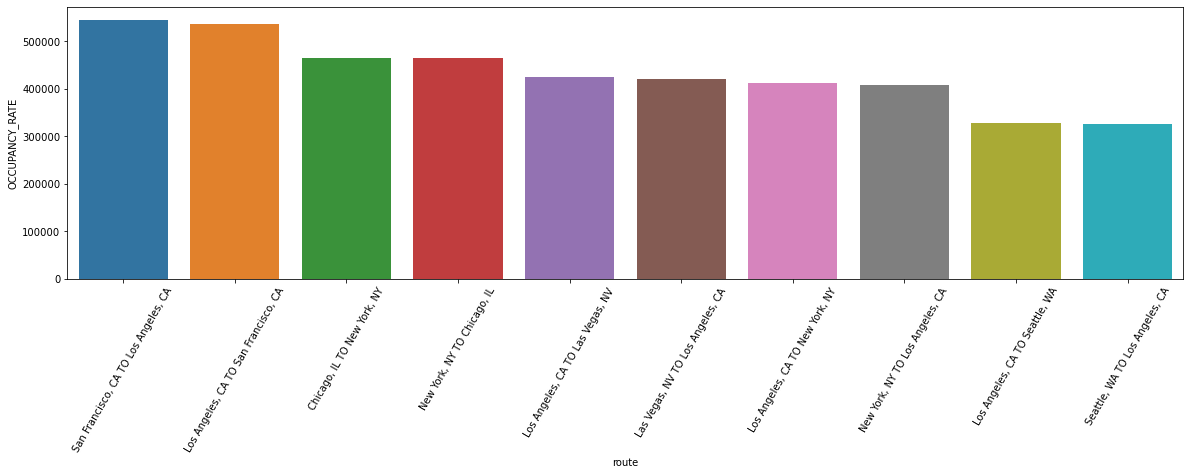

In [105]:
ax=sns.barplot(x=top_ten_busy_rounds['route'],y=top_ten_busy_rounds['OCCUPANCY_RATE'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

[Text(0, 0, 'San Francisco, CA TO Los Angeles, CA'),
 Text(1, 0, 'Los Angeles, CA TO San Francisco, CA'),
 Text(2, 0, 'Chicago, IL TO New York, NY'),
 Text(3, 0, 'New York, NY TO Chicago, IL'),
 Text(4, 0, 'Los Angeles, CA TO Las Vegas, NV'),
 Text(5, 0, 'Las Vegas, NV TO Los Angeles, CA'),
 Text(6, 0, 'Los Angeles, CA TO New York, NY'),
 Text(7, 0, 'New York, NY TO Los Angeles, CA'),
 Text(8, 0, 'Los Angeles, CA TO Seattle, WA'),
 Text(9, 0, 'Seattle, WA TO Los Angeles, CA')]

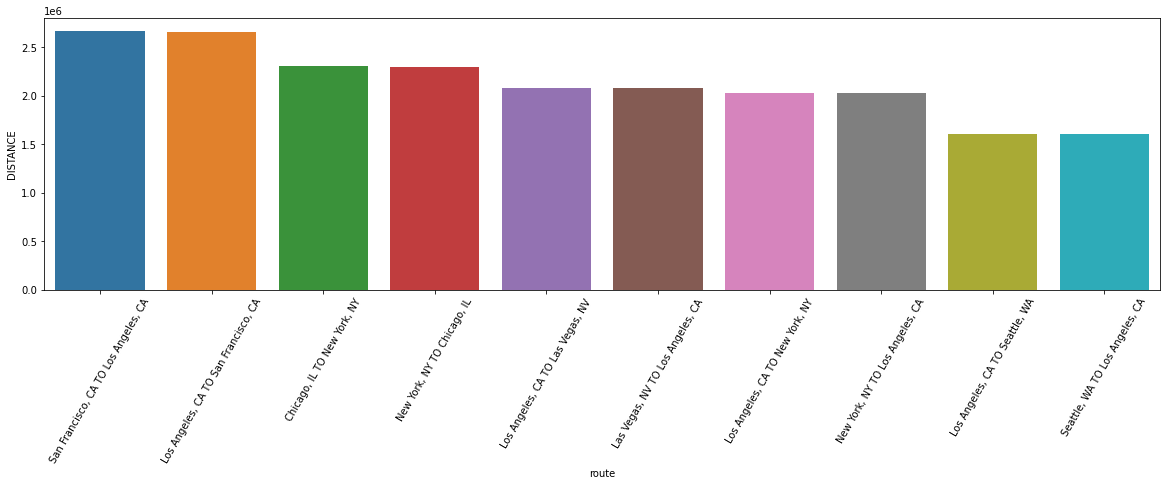

In [106]:
ax=sns.barplot(x=top_ten_busy_rounds['route'],y=top_ten_busy_rounds['DISTANCE'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

[Text(0, 0, 'San Francisco, CA TO Los Angeles, CA'),
 Text(1, 0, 'Los Angeles, CA TO San Francisco, CA'),
 Text(2, 0, 'Chicago, IL TO New York, NY'),
 Text(3, 0, 'New York, NY TO Chicago, IL'),
 Text(4, 0, 'Los Angeles, CA TO Las Vegas, NV'),
 Text(5, 0, 'Las Vegas, NV TO Los Angeles, CA'),
 Text(6, 0, 'Los Angeles, CA TO New York, NY'),
 Text(7, 0, 'New York, NY TO Los Angeles, CA'),
 Text(8, 0, 'Los Angeles, CA TO Seattle, WA'),
 Text(9, 0, 'Seattle, WA TO Los Angeles, CA')]

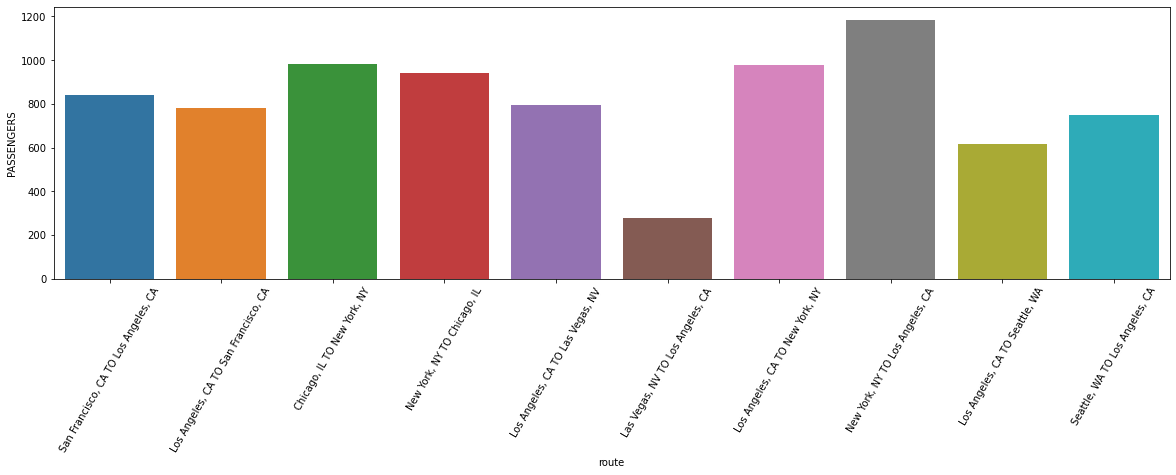

In [107]:
ax=sns.barplot(x=top_ten_busy_rounds['route'],y=top_ten_busy_rounds['PASSENGERS'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

[Text(0, 0, 'San Francisco, CA TO Los Angeles, CA'),
 Text(1, 0, 'Los Angeles, CA TO San Francisco, CA'),
 Text(2, 0, 'Chicago, IL TO New York, NY'),
 Text(3, 0, 'New York, NY TO Chicago, IL'),
 Text(4, 0, 'Los Angeles, CA TO Las Vegas, NV'),
 Text(5, 0, 'Las Vegas, NV TO Los Angeles, CA'),
 Text(6, 0, 'Los Angeles, CA TO New York, NY'),
 Text(7, 0, 'New York, NY TO Los Angeles, CA'),
 Text(8, 0, 'Los Angeles, CA TO Seattle, WA'),
 Text(9, 0, 'Seattle, WA TO Los Angeles, CA')]

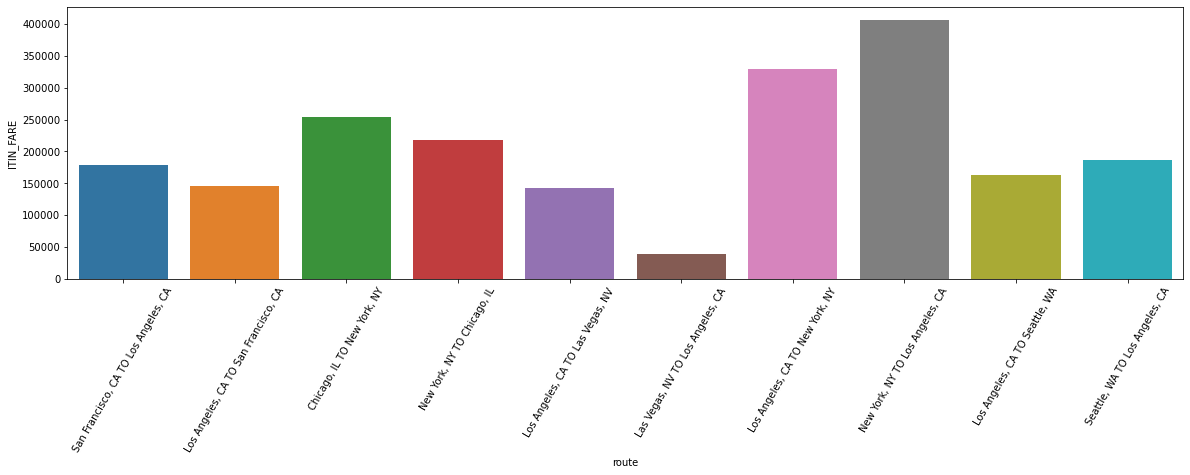

In [108]:
ax=sns.barplot(x=top_ten_busy_rounds['route'],y=top_ten_busy_rounds['ITIN_FARE'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

The question asked for 10 busiest round trips. So Even if the origin and destination are reversed. Still I am considering this route as a new one because we are doing round trips.

## Question 2
The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter.  
Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes.  Exclude canceled flights from these calculations.

In [109]:
#selecting needed fields
data=data[['route','PASSENGERS','ITIN_FARE','DEP_DELAY','ARR_DELAY','DISTANCE','OCCUPANCY_RATE','total_count','TYPE_left','TYPE_right']]

In [110]:
## Getting new fields based on the given assumptions
data['total_fare']=data['PASSENGERS']*data['ITIN_FARE']

In [111]:
#Baggage fee is $35 for each checked bag per flight. We expect 50% of passengers to check an average of 1 bag per flight. 
#The fee is charged separately for each leg of a round trip flight, thus 50% of passengers will be charged a total of $70 in baggage fees for a round trip flight.
data['baggage_cost']=data['OCCUPANCY_RATE']*70*0.5

In [112]:
# For each individual departure, the first 15 minutes of delays are free, otherwise each minute costs the airline $75 in added operational costs.
data['arr_delay_cost']=data['ARR_DELAY']*75
# For each individual arrival, the first 15 minutes of delays are free, otherwise each minute costs the airline $75 in added operational costs
data['dep_delay_cost']=data['DEP_DELAY']*75

In [113]:
#Airport operational costs for the right to use the airports and related services are fixed at $5,000 for medium airports and $10,000 for large airports. 
#There is one charge for each airport where a flight lands.  Thus, a round trip flight has a total of two airport charges
data['airport_cost']=np.where((data['TYPE_left']=='medium_airport'),data['total_count']*5000 , data['total_count']*10000)
data['airport_cost']=np.where((data['TYPE_right']=='medium_airport'),data['airport_cost']+data['total_count']*5000 , data['airport_cost']+data['total_count']*10000)

#Fuel, Oil, Maintenance, Crew - $8 per mile total
#Depreciation, Insurance, Other - $1.18 per mile total
# other cost = 8 + 1.18 = 9.18
data['other_cost']=data['DISTANCE']*9.18

In [114]:
data['income']=data['total_fare']+data['baggage_cost']
data['cost']=data['arr_delay_cost']+data['dep_delay_cost']+data['airport_cost']+data['other_cost']
# data['profit'] = data['income'] - data['cost']
# data['profit'][:10]

## Total Profit generated by a route in a quarter.

In [115]:
# df = px.data.tips()
df_passengres_route=data.sort_values(by='PASSENGERS',ascending=False)[:10]
fig = px.box(df_passengres_route, x="route", y="PASSENGERS", color='route')
fig.show()

In [116]:
df_other_cost_route=data.sort_values(by='other_cost',ascending=False)[:10]
fig = px.box(df_other_cost_route, x="route", y="other_cost", color='route')
fig.show()

In [50]:
df = px.data.tips()
df_distance_route=data.sort_values(by='route',ascending=False)[:10]
fig = px.box(df_distance_route, x="route", y="DISTANCE", color='route')
fig.show()

In [51]:
df = px.data.tips()
df_total_count_rout=data.sort_values(by='route',ascending=False)[:10]
fig = px.box(df_total_count_rout, x="route", y="total_count", color='route')
fig.show()

[Text(0, 0, 'New York, NY TO Los Angeles, CA'),
 Text(1, 0, 'New York, NY TO San Francisco, CA'),
 Text(2, 0, 'Minneapolis, MN TO Phoenix, AZ'),
 Text(3, 0, 'Los Angeles, CA TO New York, NY'),
 Text(4, 0, 'Los Angeles, CA TO Honolulu, HI'),
 Text(5, 0, 'Chicago, IL TO Los Angeles, CA'),
 Text(6, 0, 'Minneapolis, MN TO Orlando, FL'),
 Text(7, 0, 'Minneapolis, MN TO Fort Myers, FL'),
 Text(8, 0, 'Newark, NJ TO San Francisco, CA'),
 Text(9, 0, 'New York, NY TO Las Vegas, NV')]

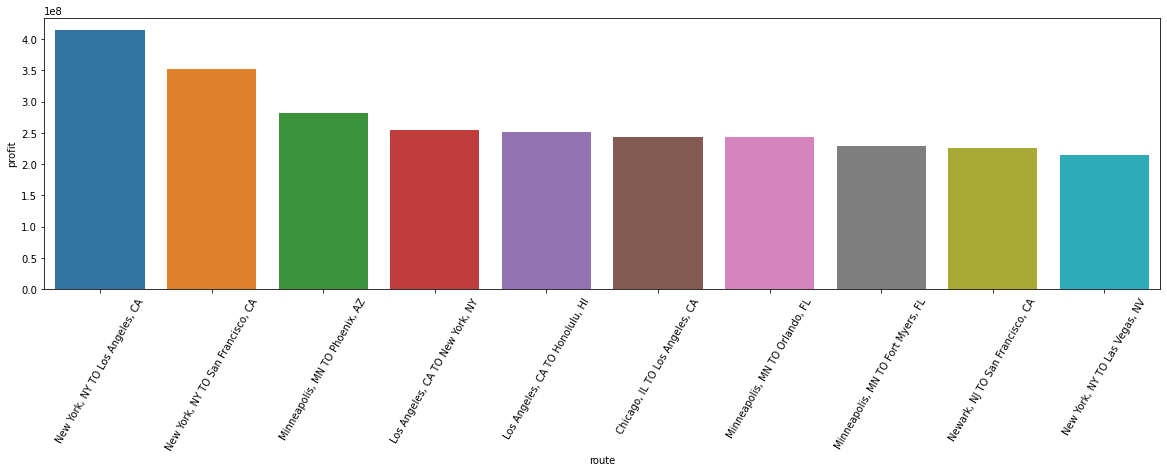

In [52]:
data['profit']=data['income']-data['cost']
df_profit_route=data.sort_values(by='profit',ascending=False)[:10]
ax=sns.barplot(x=df_profit_route['route'],y=df_profit_route['profit'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

In [53]:
#total cost
df_cost_rout=data.sort_values(by='cost',ascending=False)[:10]
df = px.data.tips()
fig = px.box(df_cost_rout, x="route", y="cost", color='route')
fig.show()

In [54]:
#total cost

df_income_rout=data.sort_values(by='income',ascending=False)[:10]
df = px.data.tips()
fig = px.box(df_cost_rout, x="route", y="income", color='route')
fig.show()

## Q3 The 5 round trip routes that you recommend to invest in based on any factors that you choose.

### The top routes based on multiple criteria to invest on for additional profit are as follows:

according to the top roundtrips flights based on profit and rout the top 5 choices would be:
 
1) New York,NY to Los Angeles,CA 
2) Minnepolis,MN to Orlando,FL 
3) New York,NY to Las Vegas,NV 
4) Los Angeles,CA to New York,CA 
5) Minnepolis,MN to Pheonix,AZ 

and according to the top roundtrips flights based on income and rout the top 5 choices would be:
1) San Francisco, CA TO Los Angeles, CA
2) Los Angeles, CA TO San Francisco, CA
3) Chicago, IL TO New York, NY
4) New York, NY TO Chicago, IL
5) Los Angeles, CA TO Las Vegas, NV

and according to the top roundtrips flights based on income and rout the top 5 choices would be:
1) New York, NY TO Los Angeles, CA
2) Minneapolis, MN TO Phoenix, AZ
3) New York, NY TO San Francisco, CA
4) Minnepolis,MN to Orlando,FL 
5) Chicago, IL TO New York, NY

In [55]:
df_passengres_route['route']

1585      New York, NY TO Los Angeles, CA
2103       Minneapolis, MN TO Phoenix, AZ
2321    New York, NY TO San Francisco, CA
1739       Minneapolis, MN TO Orlando, FL
4038          Chicago, IL TO New York, NY
1399      Los Angeles, CA TO New York, NY
1606       Chicago, IL TO Los Angeles, CA
540           New York, NY TO Chicago, IL
2597    Minneapolis, MN TO Fort Myers, FL
403     Newark, NJ TO Fort Lauderdale, FL
Name: route, dtype: object

In [56]:
df_income_rout['route']

1585      New York, NY TO Los Angeles, CA
2321    New York, NY TO San Francisco, CA
1399      Los Angeles, CA TO New York, NY
2103       Minneapolis, MN TO Phoenix, AZ
1606       Chicago, IL TO Los Angeles, CA
2968      Los Angeles, CA TO Honolulu, HI
4038          Chicago, IL TO New York, NY
1739       Minneapolis, MN TO Orlando, FL
2311      Newark, NJ TO San Francisco, CA
2597    Minneapolis, MN TO Fort Myers, FL
Name: route, dtype: object

In [118]:
df_profit_route['route']

1585      New York, NY TO Los Angeles, CA
2321    New York, NY TO San Francisco, CA
2103       Minneapolis, MN TO Phoenix, AZ
1399      Los Angeles, CA TO New York, NY
2968      Los Angeles, CA TO Honolulu, HI
1606       Chicago, IL TO Los Angeles, CA
1739       Minneapolis, MN TO Orlando, FL
2597    Minneapolis, MN TO Fort Myers, FL
2311      Newark, NJ TO San Francisco, CA
1485        New York, NY TO Las Vegas, NV
Name: route, dtype: object

## Q4 The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.

In [57]:
df_profit_route[['route','profit']]

,route,profit
1585,"New York, NY TO Los Angeles, CA",4.137439e+08
2321,"New York, NY TO San Francisco, CA",3.515525e+08
2103,"Minneapolis, MN TO Phoenix, AZ",2.817086e+08
1399,"Los Angeles, CA TO New York, NY",2.538698e+08
2968,"Los Angeles, CA TO Honolulu, HI",2.520551e+08
1606,"Chicago, IL TO Los Angeles, CA",2.441413e+08
1739,"Minneapolis, MN TO Orlando, FL",2.438537e+08
2597,"Minneapolis, MN TO Fort Myers, FL",2.285145e+08
2311,"Newark, NJ TO San Francisco, CA",2.258509e+08
1485,"New York, NY TO Las Vegas, NV",2.139447e+08


In [124]:
4.137439e+08/3165

130724.77093206951

In [123]:
df_profit_route[['route','total_count']]

,route,total_count
1585,"New York, NY TO Los Angeles, CA",3158
2321,"New York, NY TO San Francisco, CA",1860
2103,"Minneapolis, MN TO Phoenix, AZ",1124
1399,"Los Angeles, CA TO New York, NY",3162
2968,"Los Angeles, CA TO Honolulu, HI",1365
1606,"Chicago, IL TO Los Angeles, CA",1857
1739,"Minneapolis, MN TO Orlando, FL",628
2597,"Minneapolis, MN TO Fort Myers, FL",516
2311,"Newark, NJ TO San Francisco, CA",1212
1485,"New York, NY TO Las Vegas, NV",871


In [120]:
df_profit_route['average_profit']=df_profit_route['profit']/df_profit_route['total_count']
print(df_profit_route['average_profit'])
df_profit_route['number_of_round_trip_flights_to_cost_breakdown']=(round(9000000/df_profit_route['average_profit']))
df_profit_route[['route', 'number_of_round_trip_flights_to_cost_breakdown']]

1585    131014.538135
2321    189006.723270
2103    250630.420585
1399     80287.743439
2968    184655.757794
1606    131470.825862
1739    388302.005606
2597    442857.582321
2311    186345.622576
1485    245631.091860
Name: average_profit, dtype: float64


,route,number_of_round_trip_flights_to_cost_breakdown
1585,"New York, NY TO Los Angeles, CA",69.0
2321,"New York, NY TO San Francisco, CA",48.0
2103,"Minneapolis, MN TO Phoenix, AZ",36.0
1399,"Los Angeles, CA TO New York, NY",112.0
2968,"Los Angeles, CA TO Honolulu, HI",49.0
1606,"Chicago, IL TO Los Angeles, CA",68.0
1739,"Minneapolis, MN TO Orlando, FL",23.0
2597,"Minneapolis, MN TO Fort Myers, FL",20.0
2311,"Newark, NJ TO San Francisco, CA",48.0
1485,"New York, NY TO Las Vegas, NV",37.0


In [59]:
(round(9000000/df_profit_route['average_profit']))

1585     69.0
2321     48.0
2103     36.0
1399    112.0
2968     49.0
1606     68.0
1739     23.0
2597     20.0
2311     48.0
1485     37.0
Name: average_profit, dtype: float64

## Q5) Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

In [125]:
data.columns

Index(['route', 'PASSENGERS', 'ITIN_FARE', 'DEP_DELAY', 'ARR_DELAY',
       'DISTANCE', 'OCCUPANCY_RATE', 'total_count', 'TYPE_left', 'TYPE_right',
       'total_fare', 'baggage_cost', 'arr_delay_cost', 'dep_delay_cost',
       'airport_cost', 'other_cost', 'income', 'cost'],
      dtype='object')

                PASSENGERS  ITIN_FARE  DEP_DELAY  ARR_DELAY  DISTANCE  \
PASSENGERS        1.000000   0.958365   0.628690   0.639851  0.653207   
ITIN_FARE         0.958365   1.000000   0.553698   0.572454  0.574705   
DEP_DELAY         0.628690   0.553698   1.000000   0.979894  0.927546   
ARR_DELAY         0.639851   0.572454   0.979894   1.000000  0.920173   
DISTANCE          0.653207   0.574705   0.927546   0.920173  1.000000   
OCCUPANCY_RATE    0.650750   0.571796   0.927521   0.920137  0.999833   
total_count       0.650928   0.571927   0.927520   0.920286  0.999938   
total_fare        0.883142   0.879640   0.537335   0.568567  0.545060   
baggage_cost      0.650750   0.571796   0.927521   0.920137  0.999833   
arr_delay_cost    0.639851   0.572454   0.979894   1.000000  0.920173   
dep_delay_cost    0.628690   0.553698   1.000000   0.979894  0.927546   
airport_cost      0.667397   0.589526   0.928989   0.920085  0.995564   
other_cost        0.653207   0.574705   0.927546   

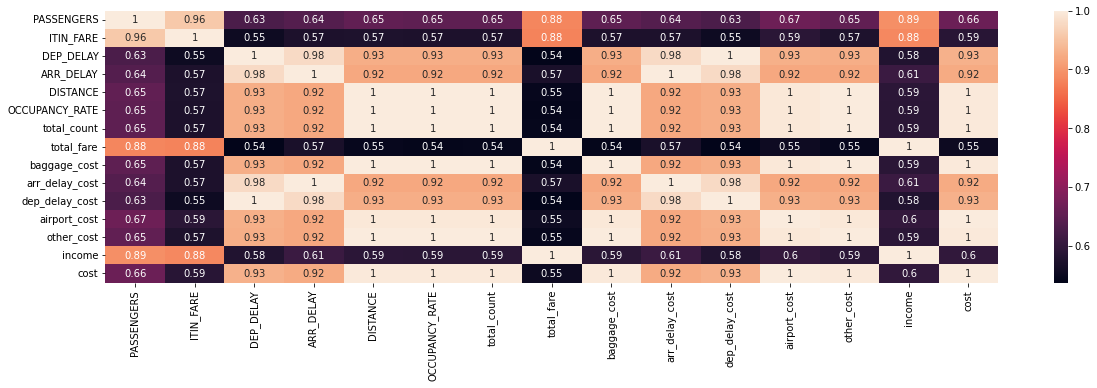

In [129]:
# checking correlation using heatmap
print(data.corr()) 
#plotting the heatmap for correlation
ax = sns.heatmap(data.corr(), annot=True)

In [62]:
#finding the statistically significant variables
#checking if the varaible has correlation with income and cost
#checking if p-value is less than .05, then we would conclude that there is a statistically significant correlation 
#between the two variables

In [136]:
data1=data[['PASSENGERS', 'ITIN_FARE', 'DEP_DELAY', 'ARR_DELAY',
       'DISTANCE', 'OCCUPANCY_RATE', 'total_count',
       'total_fare', 'baggage_cost', 'arr_delay_cost', 'dep_delay_cost',
       'airport_cost', 'other_cost', 'income', 'cost']]
for c in data1.columns:
    print(c, pearsonr(data1[c], data['income']))

PASSENGERS (0.8931310930705971, 0.0)
ITIN_FARE (0.8845352000272768, 0.0)
DEP_DELAY (0.5785905647006495, 0.0)
ARR_DELAY (0.6081645373391363, 0.0)
DISTANCE (0.5908110702937105, 0.0)
OCCUPANCY_RATE (0.5884319341895171, 0.0)
total_count (0.5886080279323117, 0.0)
total_fare (0.9984537793431376, 0.0)
baggage_cost (0.5884319341895171, 0.0)
arr_delay_cost (0.6081645373391363, 0.0)
dep_delay_cost (0.5785905647006495, 0.0)
airport_cost (0.5988938641139073, 0.0)
other_cost (0.5908110702937105, 0.0)
income (1.0, 0.0)
cost (0.5980384662163519, 0.0)


In [64]:
correlation_pvalue_init_fare=pearsonr(data['ITIN_FARE'], data['income'])
correlation_pvalue_distance=pearsonr(data['DISTANCE'], data['income'])
correlation_pvalue_occupancy_rate=pearsonr(data['OCCUPANCY_RATE'], data['income'])

correlation_pvalue_occupancy_rate=pearsonr(data['OCCUPANCY_RATE'], data['income'])
correlation_pvalue_arrival_delay=pearsonr(data['ARR_DELAY'], data['income'])

correlation_pvalue_departure_delay=pearsonr(data['DEP_DELAY'], data['income'])

print(correlation_pvalue_init_fare)
print(correlation_pvalue_distance)
print(correlation_pvalue_occupancy_rate)
print(correlation_pvalue_arrival_delay)
print(correlation_pvalue_departure_delay)

(0.8845352000272768, 0.0)
(0.5908110702937105, 0.0)
(0.5884319341895171, 0.0)
(0.6081645373391363, 0.0)
(0.5785905647006495, 0.0)


Significant KPI's in the data based on our analysis:

1) Distance
2) Fare amount
3) Fuel, oil, insurance and other costs
4) Arrival Delay
5) Departure Delay
6) Occupancy Rate

KPI's not provided in this study that focusing on them may have return in investmen and improve the quality of the service:   

1) Flight cancelleation rate and policy for cancelling before and up to 24 hours before the flight

2) Flight cancelleation rate and no-show rate (if any) prediction

3) Population and median housholde income of the city. Bigger population and income means more premium travel requirement

4) Tourism and seasonal attractions of the cities, for example more passengers may fly to warmer cities with a beach during new year holidays

5) Business or industry facilities in a city, for example many passengers may flight in and out from cities that have a large companies headquarters

6) Flight change, delay and cancelletion information to be shared with passengers in more than 24 hours from flight departure time 

7) Promotion and discounted ticket information can be a motivaional factpr for passengers especially during holiday season

8) Distribution of Business and Economy level seats